In [1]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Archivo "{name}" tamaño {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Fig0338.tif to Fig0338.tif
Archivo "Fig0338.tif" tamaño 252238 bytes


In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv.imread('Fig0338.tif', cv.IMREAD_GRAYSCALE)

kernel_3x3 = np.ones((3,3), np.float32) / 9.0
#display(kernel_3x3)


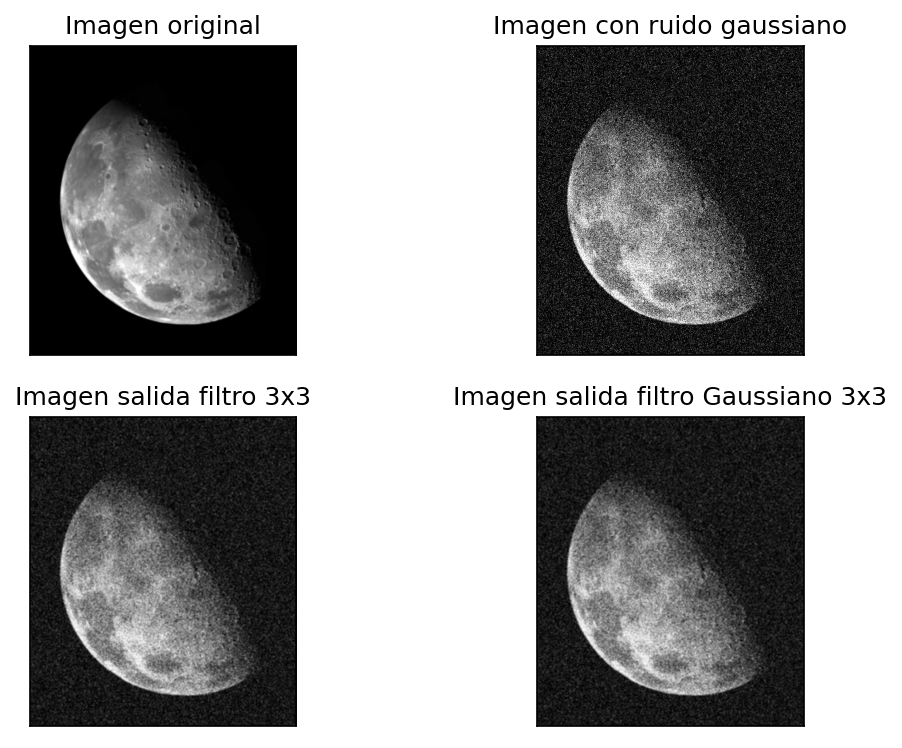

In [31]:
from skimage.util import random_noise

img_ruido = random_noise(img,  mode='gaussian', seed=None, clip=True, mean= 0, var = 0.05)
img_ruido = cv.normalize(img_ruido, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

#gauss = np.random.normal(0, 1, img.size)
#gauss = gauss.reshape(img.shape[0],img.shape[1]).astype('uint8')
# Agregar ruido gaussiano a la imagen
#img_ruido = cv.add(img,gauss)

output3x3 = cv.filter2D(img_ruido, -1, kernel_3x3)
blurred = cv.GaussianBlur(img_ruido, (3, 3), cv.BORDER_DEFAULT)

figure(figsize=(8, 6), dpi=150)
plt.subplot(2,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_ruido, cmap='gray'), plt.title('Imagen con ruido gaussiano')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(output3x3, cmap='gray'), plt.title('Imagen salida filtro 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(blurred, cmap='gray'), plt.title('Imagen salida filtro Gaussiano 3x3')
plt.xticks([]), plt.yticks([])
plt.show()